In [1]:
# @title Imports
import pandas_datareader.data as web
import datetime
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import statistics
import statistics
 
import sklearn.metrics 
from sklearn.metrics import mean_squared_error

In [2]:


df2=pd.read_excel('rainfall_ch.xlsx')
df2.dropna()
df2.info()
print(df2.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      120 non-null    datetime64[ns]
 1   Rainfall  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB
        Date  Rainfall
0 2010-01-01     15.24
1 2010-02-01      0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      120 non-null    datetime64[ns]
 1   Rainfall  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB
None


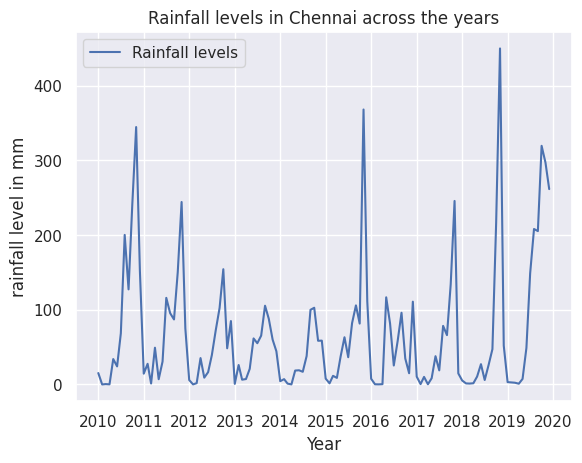

In [3]:

df2=pd.read_excel('rainfall_ch.xlsx')
sns.set()
plt.ylabel('rainfall level in mm')
plt.xlabel('Year')
plt.plot(df2['Date'],df2['Rainfall'])
plt.title('Rainfall levels in Chennai across the years')
plt.legend(['Rainfall levels'])
print(df2.info())


In [4]:

train = df2[df2.Date < pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
test = df2[df2.Date >= pd.to_datetime("2019-01-01", format='%Y-%m-%d')]
test
#108-119 indicate the levels of rainfall in the months jan to december of 2019

,Date,Rainfall
108,2019-01-01,3.1
109,2019-02-01,2.7
110,2019-03-01,2.3
111,2019-04-01,1.0
112,2019-05-01,7.4
113,2019-06-01,48.9
114,2019-07-01,148.7
115,2019-08-01,208.0
116,2019-09-01,205.2
117,2019-10-01,319.3


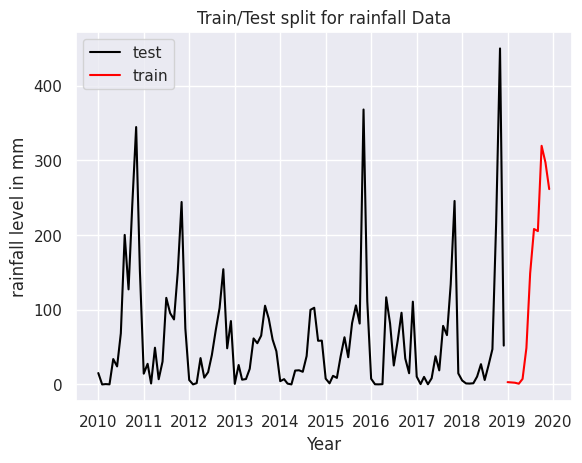

In [5]:
plt.plot(train['Date'],train['Rainfall'], color = "black")
plt.plot(test['Date'],test['Rainfall'], color = "red")
plt.legend(['test','train'])
plt.xlabel('Year')
plt.ylabel('rainfall level in mm')

plt.title("Train/Test split for rainfall Data")
plt.show()


In [6]:
#@title Arima model

y = train['Rainfall']

ARMAmodel = SARIMAX(y, order = (12, 1, 7))
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[]

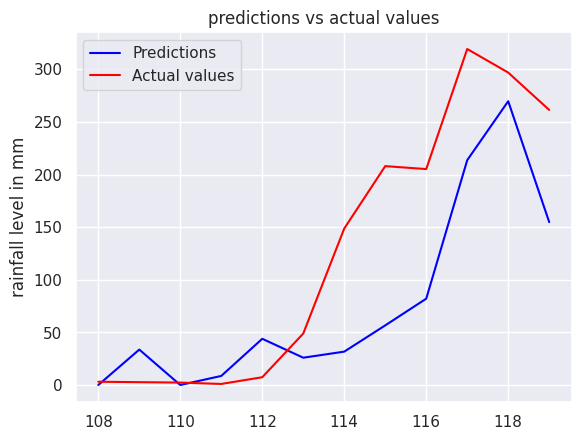

In [7]:
y_pred = ARMAmodel.get_forecast(len(test['Date']))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_df["Predictions"]  = np.maximum(y_pred_df["Predictions"] , 0)
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue')
plt.plot(test['Rainfall'],color='red')
plt.title("predictions vs actual values")
plt.legend(['Predictions','Actual values'])
plt.ylabel('rainfall level in mm')
plt.plot()

Text(0.5, 1.0, 'Future Predictions for rainfall levels in chennai')

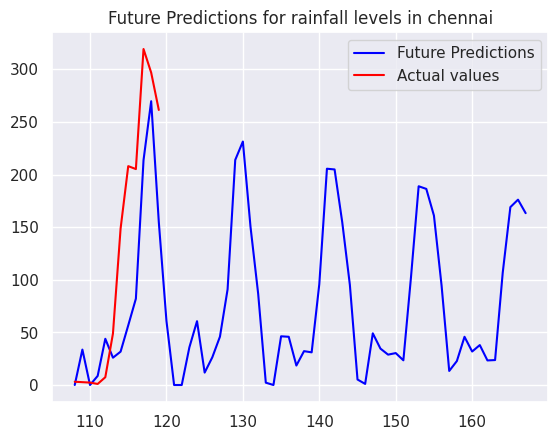

In [8]:
#future predictions

y_pred_fut = ARMAmodel.get_forecast(60)
y_pred_df_fut = y_pred_fut.conf_int(alpha = 0.05) 
y_pred_df_fut["Predictions"] = ARMAmodel.predict(start = y_pred_df_fut.index[0], end = y_pred_df_fut.index[-1])
y_pred_df_fut["Predictions"]  = np.maximum(y_pred_df_fut["Predictions"] , 0)
y_pred_out_fut = y_pred_df_fut["Predictions"] 
plt.plot(y_pred_out_fut, color='Blue')
plt.plot(test['Rainfall'],color='red')
plt.legend(['Future Predictions','Actual values'])
plt.title("Future Predictions for rainfall levels in chennai")
# the values till 167 denote predictions of rainfall from 2019-2024

In [9]:
statistics.mean(abs(y_pred_df['Predictions'] - test['Rainfall']))
#mean absolute error

61.19933259409148

In [10]:
mse = sklearn.metrics.mean_squared_error(test['Rainfall'], y_pred_df['Predictions'])  
rmse = math.sqrt(mse)  
rmse
#root mean square error

80.57807235567603